In [20]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import matplotlib.pyplot as plt

Un equipo de biólogos está estudiando dos especies de aves que habitan en una región montañosa.
Estas especies tienen preferencias distintas por ciertas condiciones ambientales, lo que influye en su
distribución geográfica. Para caracterizar los lugares donde han sido observadas, los investigadores
registran las siguientes variables:

x1: Temperatura media del hábitat (◦C)

x2: Altitud relativa del hábitat (m)

y: Especie

Descarga el conjunto de datos de especies de aves disponible en http://turing.iimas.unam.mx/~gibranfp/cursos/aprendizaje_automatizado/data/aves.csv, donde cada observación per-
tenece a una de dos especies


In [3]:


# URL del archivo de datos
url = "http://turing.iimas.unam.mx/~gibranfp/cursos/aprendizaje_automatizado/data/aves.csv"



column_names = ["x1", "x2","y"]
# Cargar los datos en un DataFrame
df = pd.read_csv(url, names=column_names,header=0)  # No tiene encabezados, por eso usamos header=None


In [22]:
df

,x1,x2,y
0,7.606876,11.421913,0.0
1,8.300079,12.352260,0.0
2,6.833771,10.770320,0.0
3,7.349341,10.903545,0.0
4,7.442586,11.730364,0.0
...,...,...,...
1995,8.580453,11.368367,1.0
1996,6.815484,8.230757,1.0
1997,7.183152,9.043539,1.0
1998,7.928611,10.058593,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2000 non-null   float64
 1   x2      2000 non-null   float64
 2   y       2000 non-null   float64
dtypes: float64(3)
memory usage: 62.5 KB


In [5]:
df.groupby('y').count()

,x1,x2
y,,
0.0,1000,1000
1.0,1000,1000


, y realiza lo siguiente:
1. Entrena un clasificador bayesiano ingenuo con atributos gaussianos.

In [6]:
X = df.drop(columns=['y'])  
y = df['y'] 
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.8, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [7]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_nb = GaussianNB()
model_nb.fit(X_train_scaled, y_train)

y_pred = model_nb.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8538
Confusion Matrix:
[[337  63]
 [ 54 346]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85       400
         1.0       0.85      0.86      0.86       400

    accuracy                           0.85       800
   macro avg       0.85      0.85      0.85       800
weighted avg       0.85      0.85      0.85       800



Procedemos a graficar los datos para visualizar como esta trabajando el clasificador

/Users/patyfernandez/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


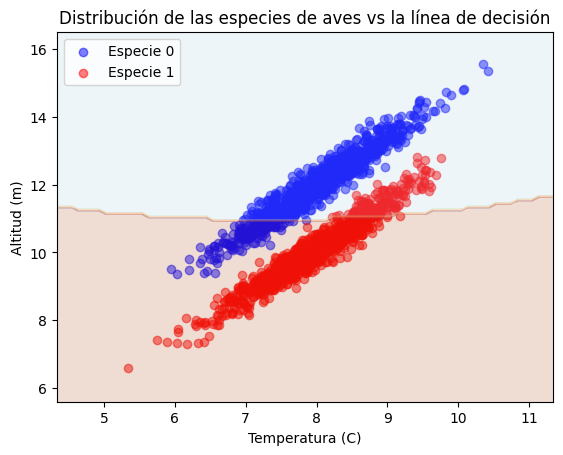

In [24]:

fig, ax = plt.subplots()

ax.scatter(species_0['x1'], species_0['x2'], label='Especie 0', alpha=0.5, color='blue')
ax.scatter(species_1['x1'], species_1['x2'], label='Especie 1', alpha=0.5, color='red')


x_min, x_max = df['x1'].min() - 1, df['x1'].max() + 1
y_min, y_max = df['x2'].min() - 1, df['x2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = model_nb.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.Paired)


ax.set_xlabel('Temperatura (C)')
ax.set_ylabel('Altitud (m)')
ax.set_title('Distribución de las especies de aves vs la línea de decisión')
ax.legend()


plt.show()

Vemos que el clasificador no se ajustó de forma adecuada, lo que se puede explicar, ya que hay una correlación entre las variables que estás visualizando.

La temperatura media del hábitat aumenta cuando la altitud aumenta, lo que rompe el principio de independencia entre las variables que supone el clasificador.

Podemos intentar hacer una rotación para que la variable altitud se vuelva independiente de la variable temperatura y así lograr tener un mejor ajuste.

In [28]:



theta = np.radians(55)  


rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                            [np.sin(theta), np.cos(theta)]])


X_rotated = X.dot(rotation_matrix)


X_train_rotated, X_temp_rotated, y_train, y_temp = train_test_split(X_rotated, y, test_size=0.8, random_state=0)
X_val_rotated, X_test_rotated, y_val, y_test = train_test_split(X_temp_rotated, y_temp, test_size=0.5, random_state=0)

scaler_rotated = StandardScaler()
X_train_scaled_rotated = scaler_rotated.fit_transform(X_train_rotated)
X_test_scaled_rotated = scaler_rotated.transform(X_test_rotated)

model_nb_rotated = GaussianNB()
model_nb_rotated.fit(X_train_scaled_rotated, y_train)

y_pred_rotated = model_nb_rotated.predict(X_test_scaled_rotated)

accuracy_rotated = accuracy_score(y_test, y_pred_rotated)
conf_matrix_rotated = confusion_matrix(y_test, y_pred_rotated)
class_report_rotated = classification_report(y_test, y_pred_rotated)

print(f'Accuracy (rotated): {accuracy_rotated:.4f}')
print('Confusion Matrix (rotated):')
print(conf_matrix_rotated)
print('Classification Report (rotated):')
print(class_report_rotated)

Accuracy (rotated): 1.0000
Confusion Matrix (rotated):
[[400   0]
 [  0 400]]
Classification Report (rotated):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       400
         1.0       1.00      1.00      1.00       400

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



Al hacer la independencia entre las variables (una clase tiene un valor y otra clase tiene otro valor) se puede ver como logramos un ajuste perfecto.

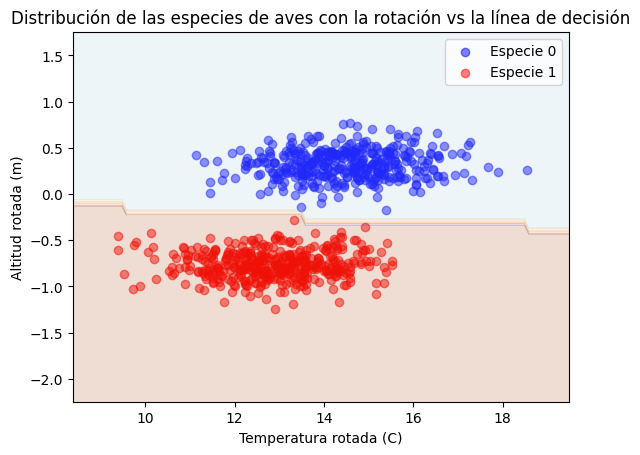

In [30]:

fig, ax = plt.subplots()


species_0_rotated = X_val_rotated[y_val == 0]
species_1_rotated = X_val_rotated[y_val == 1]

ax.scatter(species_0_rotated[0], species_0_rotated[1], label='Especie 0', alpha=0.5, color='blue')
ax.scatter(species_1_rotated[0], species_1_rotated[1], label='Especie 1', alpha=0.5, color='red')



x_min_rotated, x_max_rotated = X_val_rotated[0].min() - 1, X_val_rotated[0].max() + 1
y_min_rotated, y_max_rotated = X_val_rotated[1].min() - 1, X_val_rotated[1].max() + 1
xx_rotated, yy_rotated = np.meshgrid(np.arange(x_min_rotated, x_max_rotated, 0.1),
                                     np.arange(y_min_rotated, y_max_rotated, 0.1))


Z_rotated = model_nb_rotated.predict(scaler_rotated.transform(np.c_[xx_rotated.ravel(), yy_rotated.ravel()]))
Z_rotated = Z_rotated.reshape(xx_rotated.shape)


ax.contourf(xx_rotated, yy_rotated, Z_rotated, alpha=0.2, cmap=plt.cm.Paired)


ax.set_xlabel('Temperatura rotada (C)')
ax.set_ylabel('Altitud rotada (m)')
ax.set_title('Distribución de las especies de aves con la rotación vs la línea de decisión')
ax.legend()


plt.show()